Epoch 1/20


C:\Users\sudha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


652/652 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8287 - loss: 0.4139 - val_accuracy: 0.8628 - val_loss: 0.3617
Epoch 2/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8586 - loss: 0.3466 - val_accuracy: 0.8776 - val_loss: 0.3225
Epoch 3/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8698 - loss: 0.3296 - val_accuracy: 0.8807 - val_loss: 0.3091
Epoch 4/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8731 - loss: 0.3208 - val_accuracy: 0.8807 - val_loss: 0.3050
Epoch 5/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8777 - loss: 0.3152 - val_accuracy: 0.8780 - val_loss: 0.3064
Epoch 6/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8800 - loss: 0.3101 - val_accuracy: 0.8832 - val_loss: 0.3005
Epoch 7/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8821 - loss: 0.3073 - val_accuracy: 0.8836 - val_loss: 0.3000
Epoch 8/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8826 - loss: 0.3053 - val_accuracy: 0.8824 - val_

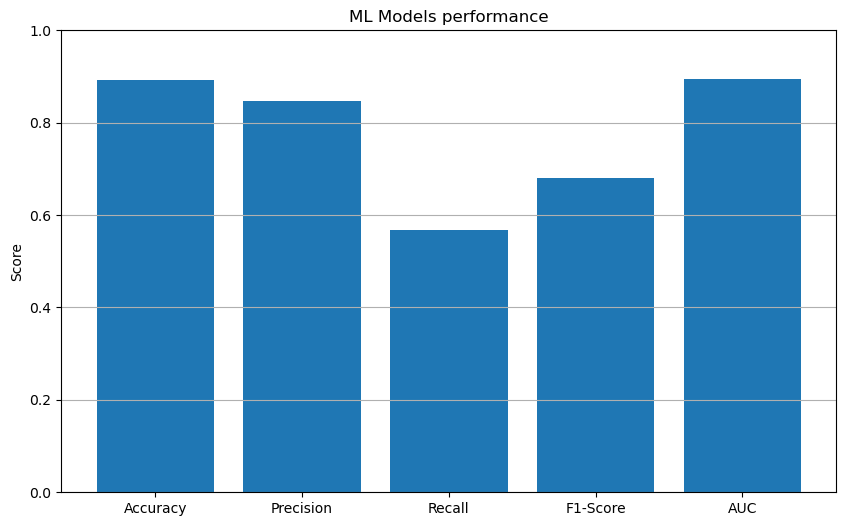

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = pd.read_csv(r"C:\Users\sudha\Downloads\credit_risk_dataset.csv")

y = df["loan_status"].astype(int).values
X_df = df.drop(columns=["loan_status"])

X_df = pd.get_dummies(X_df, drop_first=True)

X_df = X_df.replace([np.inf, -np.inf], np.nan)
X_df = X_df.fillna(X_df.median(numeric_only=True))

X = X_df.values.astype("float32")

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0).astype("float32")

X = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_prob = model.predict(X_test, verbose=0).ravel()
y_prob = np.nan_to_num(y_prob, nan=0.0, posinf=0.0, neginf=0.0)
y_pred = (y_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

auc = roc_auc_score(y_test, y_prob) if len(np.unique(y_test)) == 2 else float("nan")

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
}

print(metrics)

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("ML Models performance")
plt.grid(axis="y")
plt.show()
